In [181]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from scipy.stats import pearsonr

In [101]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1')

/var/folders/9d/9z514xq526zb08lz16wbgfq00000gn/T/ipykernel_72302/3700301979.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1')


1. Data Cleaning:

In [102]:
df.sample(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
78277,200506140004,2005,6,14,NaN,0,NaN,205,Thailand,5,...,NaN,"Thanaporn Promyamyai, ""Police Say Outbreak of ...","""Police Report Another Buddhist Beheaded in T...","""Thailand: Suspected Islamic Militants 'Behea...",CETIS,-9,-9,0,-9,"200506140004, 200506150001"
76998,200409150003,2004,9,15,NaN,0,NaN,185,Spain,8,...,NaN,Explosions damage electrical pylon in Basque ...,NaN,NaN,CETIS,0,1,0,1,NaN
128475,201403080049,2014,3,8,NaN,0,NaN,95,Iraq,10,...,NaN,"""Iraq: Roundup of Security Incidents 03-10 Mar...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
119805,201308020021,2013,8,2,NaN,0,NaN,95,Iraq,10,...,NaN,"""10 killed in insurgent attacks across Iraq,"" ...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
52963,199209110008,1992,9,11,NaN,0,NaN,43,Chile,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
91326,200904020016,2009,4,2,NaN,0,NaN,160,Philippines,5,...,NaN,"GMA News, ""NPA Rebels Burned Tractor in Cagaya...",NaN,NaN,ISVG,0,0,0,0,NaN
66288,199708150007,1997,8,15,NaN,0,NaN,110,Lebanon,10,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
2244,197402230002,1974,2,23,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
146409,201504040054,2015,4,3,NaN,0,NaN,113,Libya,10,...,Casualty numbers for this incident conflict ac...,"""1 killed in RPG attack on Libyan capital'...","""Libya Daily Digest April 07, 2015,"" Libya Dig...",NaN,START Primary Collection,-9,-9,1,1,NaN
153185,201509160092,2015,9,16,NaN,0,NaN,92,India,6,...,NaN,"""Bombs hurled at Choudwar circle jail,"" The St...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [103]:
df['iyear'].unique()
df['imonth'].unique()
df['iday'].unique()

array([ 2,  0,  1,  3,  6,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22,
       25, 26, 27, 28, 30, 31,  4,  7, 16, 17, 18, 23, 24,  5, 29])

In [104]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
df[df.columns[:20]]


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1


In [106]:
df[df.columns[20:40]]


,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1
0,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman
1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter"
2,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee
3,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy
4,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint
181687,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base
181688,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses
181689,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office


In [107]:
df[df.columns[40:60]]

,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname
0,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN
1,21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN
2,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
3,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
4,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN
181687,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN
181688,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN
181689,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN


In [108]:
df[df.columns[60:80]]

,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt
0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
181687,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181688,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181689,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
df[df.columns[80:100]]


,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus
0,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN
4,NaN,8,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incendiary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
181687,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0
181688,NaN,8,Incendiary,18.0,Arson/Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
181689,NaN,6,Explosives,7.0,Grenade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0


In [110]:
df[df.columns[100:120]]


,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid
0,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN
2,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181687,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181688,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181689,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df[df.columns[120:]]


,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


Set column from FLOAT to INT

In [112]:
df['targsubtype1'].unique()

array([ 68.,  45.,  54.,  46.,  22.,  25., 107.,  28.,  21.,  27.,  42.,
         7.,  nan,  34.,  49.,   4., 110.,  76.,  71.,  14.,  23.,  86.,
        73.,  99.,  15.,   8.,  44.,   3.,  12.,  96., 100.,  69.,   1.,
        53.,  32.,  17.,  11.,  82.,   2.,  81.,  18.,  79.,   5.,  62.,
        67.,  84.,  90.,  43.,  52.,  77.,  35.,  61.,  88.,   9.,  93.,
        29.,  64.,  50.,  78.,  10., 108.,   6.,  75.,  80.,  47.,  87.,
        95.,  89.,  56.,  55., 109., 104.,  59.,  98.,  97.,  16.,  57.,
       106.,  37.,  31., 105.,  48.,  85.,  58.,  94.,  74.,  26., 102.,
       101., 103.,  20., 113.,  70., 112.,  40.,  19.,  92.,  72.,  51.,
        13.,  60.,  24.,  83.,  65.,  39.,  36., 111.,  41.,  91.,  63.,
        30.,  66.,  33.])

In [113]:
df.loc[df['targsubtype1'].isna(), 'targsubtype1'] = 0
df[df['targsubtype1'].isna()]['targsubtype1']


Series([], Name: targsubtype1, dtype: float64)

In [114]:
df['targsubtype1'] = df['targsubtype1'].astype(int)
df['targsubtype1']

0         68
1         45
2         54
3         46
4         46
          ..
181686    36
181687    27
181688    76
181689    21
181690     0
Name: targsubtype1, Length: 181691, dtype: int64

In [115]:
df[df['natlty1'].isna()]['natlty1']

104      NaN
108      NaN
110      NaN
290      NaN
697      NaN
          ..
181500   NaN
181538   NaN
181580   NaN
181633   NaN
181634   NaN
Name: natlty1, Length: 1559, dtype: float64

In [116]:
df.loc[df['natlty1'].isna(), 'natlty1'] = 0
df[df['natlty1'].isna()]['natlty1']

Series([], Name: natlty1, dtype: float64)

In [117]:
df['natlty1'] = df['natlty1'].astype(int)
df['natlty1']


0          58
1          21
2         217
3         217
4         217
         ... 
181686    182
181687    167
181688    160
181689     92
181690    160
Name: natlty1, Length: 181691, dtype: int64

Make date column from 3 columns

In [118]:
df['imonth'].unique()

array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12])

Replace O-values in 'imonth', 'iday' columns

In [119]:
df.loc[df['imonth'] == 0,'imonth'] = 1
df[df['imonth'] == 0]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [120]:
df['iday'].unique()

array([ 2,  0,  1,  3,  6,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22,
       25, 26, 27, 28, 30, 31,  4,  7, 16, 17, 18, 23, 24,  5, 29])

In [121]:
df.loc[df['iday'] == 0,'iday'] = 1
df[df['iday'] == 0]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [122]:
# df['date'] = pd.to_datetime(df[['iyear', 'imonth', 'iday']], format='%Y/%m/%d')
df['date'] = df.apply(lambda row: pd.Timestamp(row['iyear'], row['imonth'], row['iday'], 0, 0, 0), axis=1)

df['date']



0        1970-07-02
1        1970-01-01
2        1970-01-01
3        1970-01-01
4        1970-01-01
            ...    
181686   2017-12-31
181687   2017-12-31
181688   2017-12-31
181689   2017-12-31
181690   2017-12-31
Name: date, Length: 181691, dtype: datetime64[ns]

In [123]:
df = df.drop(['iyear', 'imonth', 'iday'], axis=1)

**2. Data Transformation:**
Categorical Transformation: Convert categorical data into a format suitable for analysis, such as one-hot encoding.

One-hot encoding for categorical transformation for columns 'attacktype1_txt' and 'weaptype1_txt'

In [135]:
df_transform = pd.get_dummies(df, columns=['attacktype1_txt'])
df_transform

,eventid,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,...,date,attacktype1_txt_Armed Assault,attacktype1_txt_Assassination,attacktype1_txt_Bombing/Explosion,attacktype1_txt_Facility/Infrastructure Attack,attacktype1_txt_Hijacking,attacktype1_txt_Hostage Taking (Barricade Incident),attacktype1_txt_Hostage Taking (Kidnapping),attacktype1_txt_Unarmed Assault,attacktype1_txt_Unknown
0,197000000001,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,...,1970-07-02,False,True,False,False,False,False,False,False,False
1,197000000002,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,...,1970-01-01,False,False,False,False,False,False,True,False,False
2,197001000001,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,...,1970-01-01,False,True,False,False,False,False,False,False,False
3,197001000002,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,...,1970-01-01,False,False,True,False,False,False,False,False,False
4,197001000003,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,...,1970-01-01,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,...,2017-12-31,True,False,False,False,False,False,False,False,False
181687,201712310029,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,...,2017-12-31,False,False,True,False,False,False,False,False,False
181688,201712310030,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,...,2017-12-31,False,False,False,True,False,False,False,False,False
181689,201712310031,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,...,2017-12-31,False,False,True,False,False,False,False,False,False


In [127]:
df['weaptype1_txt'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [136]:
df_transform = pd.get_dummies(df_transform, columns=['weaptype1_txt'])
df_transform

,eventid,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,...,weaptype1_txt_Explosives,weaptype1_txt_Fake Weapons,weaptype1_txt_Firearms,weaptype1_txt_Incendiary,weaptype1_txt_Melee,weaptype1_txt_Other,weaptype1_txt_Radiological,weaptype1_txt_Sabotage Equipment,weaptype1_txt_Unknown,"weaptype1_txt_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
0,197000000001,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,...,False,False,False,False,False,False,False,False,True,False
1,197000000002,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,...,False,False,False,False,False,False,False,False,True,False
2,197001000001,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,...,False,False,False,False,False,False,False,False,True,False
3,197001000002,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,...,True,False,False,False,False,False,False,False,False,False
4,197001000003,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,...,False,False,True,False,False,False,False,False,False,False
181687,201712310029,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,...,True,False,False,False,False,False,False,False,False,False
181688,201712310030,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,...,False,False,False,True,False,False,False,False,False,False
181689,201712310031,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,...,True,False,False,False,False,False,False,False,False,False


Numerical Normalization: Normalize or standardize numerical features as required.
Normalization column: nperps
The total number of terrorists participating in the incident

In [138]:
df['nperps'].describe()

count    110576.000000
mean        -65.361154
std         216.536633
min         -99.000000
25%         -99.000000
50%         -99.000000
75%           1.000000
max       25000.000000
Name: nperps, dtype: float64

In [182]:
df[df['nperps'] < 0]['nperps']


5        -99.0
7        -99.0
11       -99.0
13       -99.0
14       -99.0
          ... 
181686   -99.0
181687   -99.0
181688   -99.0
181689   -99.0
181690   -99.0
Name: nperps, Length: 82220, dtype: float64

In [186]:
df5 = df.copy()
df5.loc[df['nperps'] < 0, 'nperps'] = pd.NA
# df5[df5['nperps'] > 0]['nperps']
df5['nperps'].describe()

count    28356.000000
mean        32.170440
std        412.375875
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
max      25000.000000
Name: nperps, dtype: float64

In [215]:
# scaler = StandardScaler()
# df_standardized = pd.DataFrame(scaler.fit_transform(df5['nperps'].values.reshape(-1, 1)), columns='nperps')
# print("Standardized Data:")
# print(df_standardized['nperps'])

scaler = MinMaxScaler()

zdf = df5['nperps']
column_z = scaler.fit_transform(zdf.values.reshape(-1, 1))
df_standardized = pd.DataFrame(column_z, columns=['nperps'])
print("Standardized Data:")
df_standardized.sample(30)

Standardized Data:


,nperps
43613,0.00060
13787,NaN
127877,NaN
86548,NaN
11816,NaN
125978,0.00004
1471,NaN
142382,NaN
109560,NaN
34048,0.00400


3. Exploratory Data Analysis:

In [219]:
rdf = pd.concat([df['attacktype1'], df_standardized], axis=1)
rdf = rdf.dropna()
rdf

corr, _ = pearsonr(rdf['attacktype1'], rdf['nperps'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')
rdf

Pearson Correlation Coefficient: 0.06


,attacktype1,nperps
1,6,0.00028
6,1,0.00012
8,7,0.00004
9,7,0.00004
12,4,0.00004
...,...,...
181653,3,0.00004
181656,2,0.00064
181660,5,0.00004
181665,7,0.00048


In [208]:
rdf = pd.concat([df['region'], df_standardized], axis=1)
rdf = rdf.dropna()
rdf

corr, _ = pearsonr(rdf['region'], rdf['nperps'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

Pearson Correlation Coefficient: -0.04


In [209]:
rdf = pd.concat([df['weaptype1'], df_standardized], axis=1)
rdf = rdf.dropna()
rdf

corr, _ = pearsonr(rdf['weaptype1'], rdf['nperps'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')


Pearson Correlation Coefficient: 0.04


In [210]:

rdf = pd.concat([df['success'], df_standardized], axis=1)
rdf = rdf.dropna()
rdf

corr, _ = pearsonr(rdf['success'], rdf['nperps'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')



Pearson Correlation Coefficient: 0.02


In [220]:
df['natlty1']
rdf = pd.concat([df['natlty1'], df_standardized], axis=1)
rdf = rdf.dropna()
rdf

corr, _ = pearsonr(rdf['natlty1'], rdf['nperps'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')


Pearson Correlation Coefficient: -0.01


Conclusion: There are no correlation between number of terrorists and other data

In [221]:

rdf = pd.concat([df['natlty1'], df_standardized], axis=1)
rdf = rdf.dropna()


corr, _ = pearsonr(rdf['natlty1'], rdf['nperps'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

,natlty1,nperps
1,21,0.00028
6,218,0.00012
8,217,0.00004
9,217,0.00004
12,217,0.00004
...,...,...
505,97,0.00008
508,217,0.00012
512,217,0.00016
513,11,0.00012


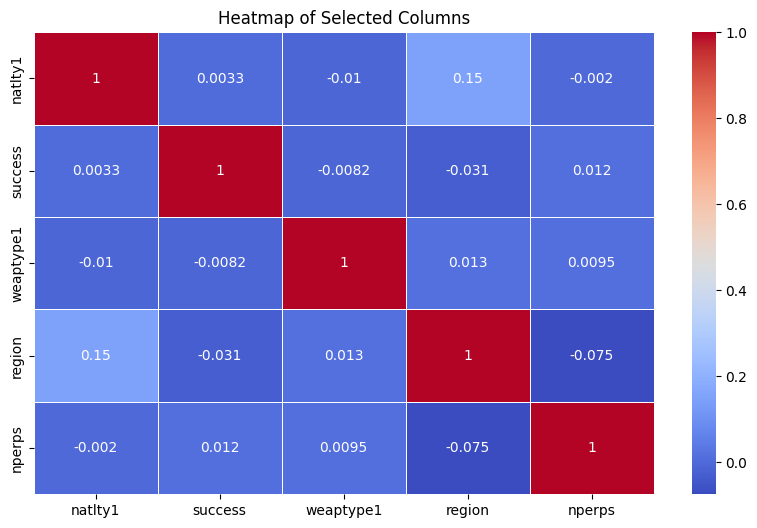

In [224]:

selected_columns = ['natlty1', 'success', 'weaptype1', 'region', 'nperps']
df_selected = df[selected_columns]
plt.figure(figsize=(10, 6))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Selected Columns')
plt.show()

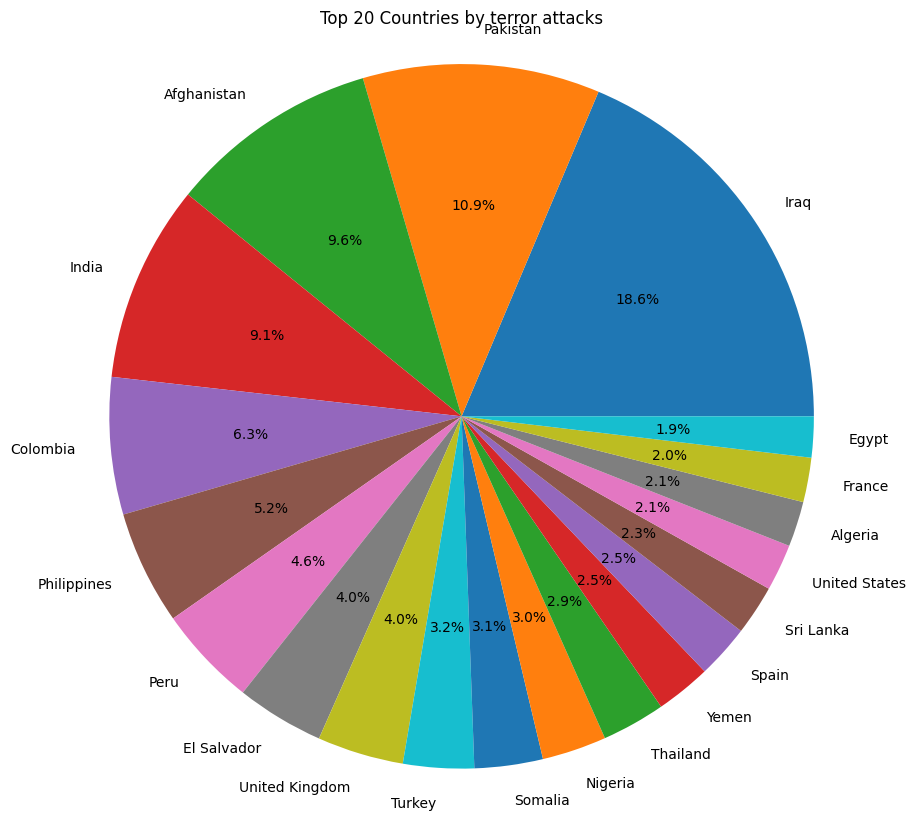

In [234]:

country_counts = df['country_txt'].value_counts()
country_counts = country_counts.sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 10))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Top 20 Countries by terror attacks')
plt.show()

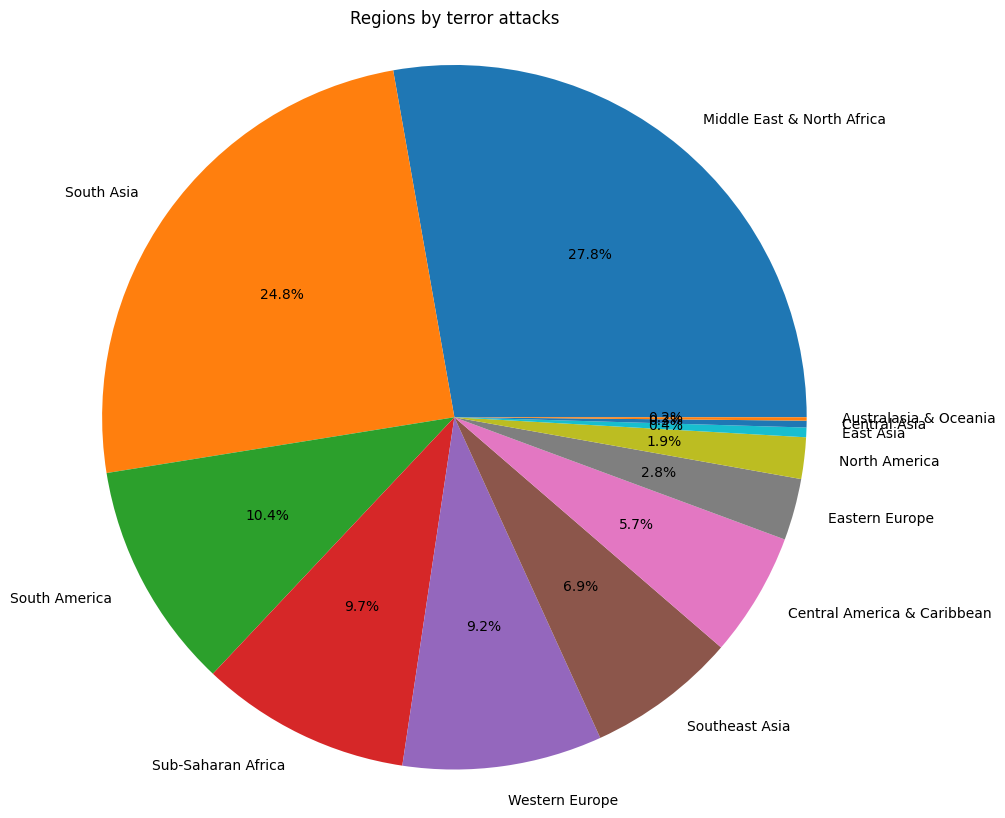

In [235]:

country_counts = df['region_txt'].value_counts()
country_counts = country_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 10))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Regions by terror attacks')
plt.show()